<h2><strong>Proyecto. Datos de vuelos del Departamento de Transporte de Estados Unidos.</strong></h3>
<ul>
  <li><strong>Jesús García Abreu</strong></li>
</ul>

### 1. **Instalar y cargar paquetes necesarios**

In [ ]:
library(tidyverse) # Librería para manipulación, limpieza, análisis y visualización de datos
library(ggplot2) # Librería para visualización de datos
library(dplyr) # Librería para manipulación y transformación de datos
library(forcats)
install.packages("yardstick")
library(yardstick)
install.packages("rsample")
library(rsample)
library(yardstick)
library(broom)
install.packages("tidymodels")
library(tidymodels)
library(recipes)
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 2. **Cargar conjunto de datos.**

In [ ]:
df <- readr::read_csv("flights.csv")

Rows: 271940 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Carrier, OriginAirportName, OriginCity, OriginState, DestAirportNa...
dbl (13): Year, Month, DayofMonth, DayOfWeek, OriginAirportID, DestAirportID...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Ver las primeras filas
head(df)

# Ver cuántas filas y columnas tiene
dim(df)

Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1,1027,33,1,0
2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1,2035,183,1,0


[1] 271940     20

El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la llegada (los vuelos que llegaron antes de lo previsto tienen un valor negativo)
- **ArrDelay15**: Un indicador binario de que la llegada se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **Cancelled**: Si se cancelo el vuelo

## 3. **Análisis exploratorio de datos**

#### 3.1 **Tipos de datos**

In [ ]:
names(df)
str(df)
sapply(df, class)

[1] "Year"              "Month"             "DayofMonth"       
 [4] "DayOfWeek"         "Carrier"           "OriginAirportID"  
 [7] "OriginAirportName" "OriginCity"        "OriginState"      
[10] "DestAirportID"     "DestAirportName"   "DestCity"         
[13] "DestState"         "CRSDepTime"        "DepDelay"         
[16] "DepDel15"          "CRSArrTime"        "ArrDelay"         
[19] "ArrDel15"          "Cancelled"

spc_tbl_ [271,940 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Year             : num [1:271940] 2013 2013 2013 2013 2013 ...
 $ Month            : num [1:271940] 9 9 9 7 5 7 10 7 10 5 ...
 $ DayofMonth       : num [1:271940] 16 23 7 22 16 28 6 28 8 12 ...
 $ DayOfWeek        : num [1:271940] 1 1 6 1 4 7 7 7 2 7 ...
 $ Carrier          : chr [1:271940] "DL" "WN" "AS" "OO" ...
 $ OriginAirportID  : num [1:271940] 15304 14122 14747 13930 13931 ...
 $ OriginAirportName: chr [1:271940] "Tampa International" "Pittsburgh International" "Seattle/Tacoma International" "Chicago O'Hare International" ...
 $ OriginCity       : chr [1:271940] "Tampa" "Pittsburgh" "Seattle" "Chicago" ...
 $ OriginState      : chr [1:271940] "FL" "PA" "WA" "IL" ...
 $ DestAirportID    : num [1:271940] 12478 13232 11278 11042 10397 ...
 $ DestAirportName  : chr [1:271940] "John F. Kennedy International" "Chicago Midway International" "Ronald Reagan Washington National" "Cleveland-Hopkins International" ...
 $ Des

Year             Month        DayofMonth         DayOfWeek 
        "numeric"         "numeric"         "numeric"         "numeric" 
          Carrier   OriginAirportID OriginAirportName        OriginCity 
      "character"         "numeric"       "character"       "character" 
      OriginState     DestAirportID   DestAirportName          DestCity 
      "character"         "numeric"       "character"       "character" 
        DestState        CRSDepTime          DepDelay          DepDel15 
      "character"         "numeric"         "numeric"         "numeric" 
       CRSArrTime          ArrDelay          ArrDel15         Cancelled 
        "numeric"         "numeric"         "numeric"         "numeric"

#### 3.2 **Conteo de valores nulos**

In [ ]:
na_counts <- sapply(df, function(x) sum(is.na(x)))
na_counts

Year             Month        DayofMonth         DayOfWeek 
                0                 0                 0                 0 
          Carrier   OriginAirportID OriginAirportName        OriginCity 
                0                 0                 0                 0 
      OriginState     DestAirportID   DestAirportName          DestCity 
                0                 0                 0                 0 
        DestState        CRSDepTime          DepDelay          DepDel15 
                0                 0                 0              2761 
       CRSArrTime          ArrDelay          ArrDel15         Cancelled 
                0                 0                 0                 0

#### 3.3 **Inputación de valores**

In [ ]:
df <- df %>%
  mutate(
    DepDel15 = if_else(is.na(DepDel15),
                       if_else(DepDelay > 15, 1, 0),
                       DepDel15)
  )

sum(is.na(df$DepDel15))

[1] 0

#### 3.4 **Identificación de Outliers**

In [ ]:
# Columnas numéricas
numericos <- names(df)[sapply(df, is.numeric)]

encontrar_outliers <- function(data, cols) {
  outliers <- list()

  for (col in cols) {
    x <- data[[col]]
    x <- x[!is.na(x)]

    q1 <- quantile(x, 0.25, names = FALSE)
    q3 <- quantile(x, 0.75, names = FALSE)
    iqr <- q3 - q1

    lower_bound <- q1 - 1.5 * iqr
    upper_bound <- q3 + 1.5 * iqr

    outlier_count <- sum(x < lower_bound | x > upper_bound)

    if (outlier_count > 0) {
      outliers[[col]] <- outlier_count
    }
  }

  # Convertir a vector nombrado
  unlist(outliers)
}

outlier_counts <- encontrar_outliers(df, numericos)
outlier_counts


DepDelay  DepDel15  ArrDelay  ArrDel15 Cancelled 
    34058     54141     25319     58720      2916

#### 3.5 **Selección de variables no binarias para los outliers**

In [ ]:
cols_outliers <- names(outlier_counts)
cols_outliers <- setdiff(cols_outliers, c("DepDel15", "ArrDel15", "Cancelled"))
cols_outliers

[1] "DepDelay" "ArrDelay"

In [ ]:
# Resumen tipo describe (min, Q1, mediana, mean, Q3, max)
summary(df[, cols_outliers])

    DepDelay          ArrDelay       
 Min.   : -63.00   Min.   : -75.000  
 1st Qu.:  -4.00   1st Qu.: -11.000  
 Median :  -1.00   Median :  -3.000  
 Mean   :  10.35   Mean   :   6.497  
 3rd Qu.:   9.00   3rd Qu.:  10.000  
 Max.   :1425.00   Max.   :1440.000  

#### 3.6 **Gráfica de Cajas y Bigotes e Histograma para outliers**

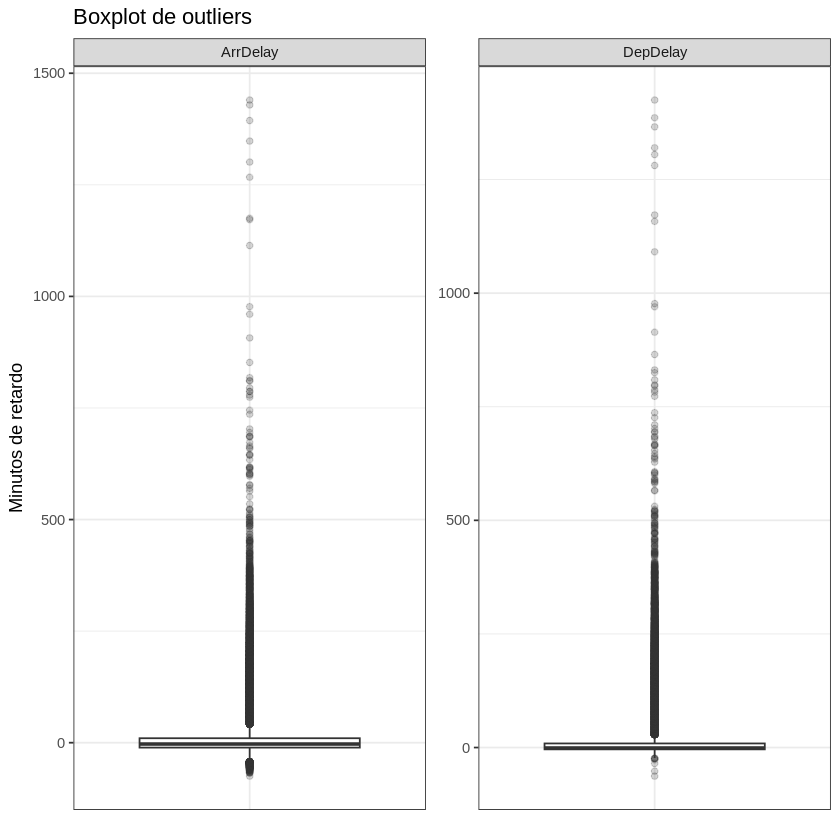

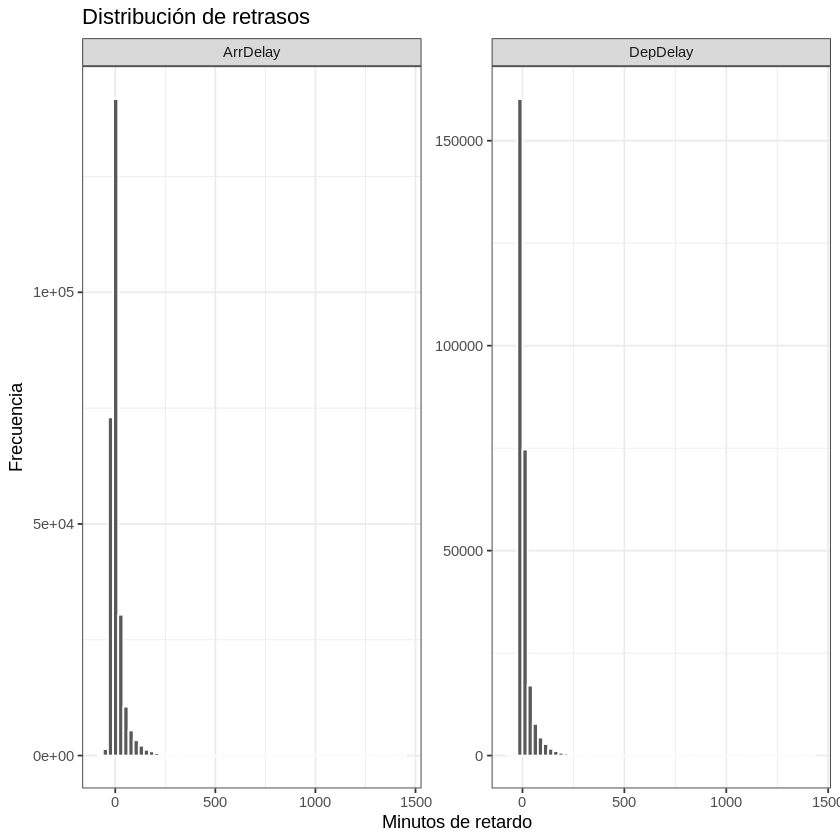

In [ ]:
df_long <- df %>%
  select(all_of(cols_outliers)) %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "value")

# 1) Boxplots (uno por variable)
ggplot(df_long, aes(x = "", y = value)) +
  geom_boxplot(outlier.alpha = 0.2) +
  facet_wrap(~variable, scales = "free") +
  labs(title = "Boxplot de outliers", x = "", y = "Minutos de retardo") +
  theme_bw() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

# 2) Histogramas (uno por variable)
ggplot(df_long, aes(x = value)) +
  geom_histogram(bins = 60, color = "white") +
  facet_wrap(~variable, scales = "free") +
  labs(title = "Distribución de retrasos", x = "Minutos de retardo", y = "Frecuencia") +
  theme_bw()

#### 3.7 **Calcular percentiles**

In [ ]:
dep_p <- quantile(df$DepDelay, probs = c(0.01, 0.90), na.rm = TRUE)
arr_p <- quantile(df$ArrDelay, probs = c(0.01, 0.90), na.rm = TRUE)

dep_p1  <- as.numeric(dep_p[1])
dep_p90 <- as.numeric(dep_p[2])

arr_p1  <- as.numeric(arr_p[1])
arr_p90 <- as.numeric(arr_p[2])

cat("DepDelay - P1:", dep_p1, " P90:", dep_p90, "\n")
cat("ArrDelay - P1:", arr_p1, " P90:", arr_p90, "\n")

DepDelay - P1: -12  P90: 37 
ArrDelay - P1: -33  P90: 38 


#### 3.8 **Filtrar/Recortar outliers**

In [ ]:
df_clean <- df %>%
  filter(
    DepDelay >= dep_p1, DepDelay <= dep_p90,
    ArrDelay >= arr_p1, ArrDelay <= arr_p90
  )

In [ ]:
cat("Filas antes:", nrow(df), "\n")
cat("Filas después:", nrow(df_clean), "\n")
cat("Filas eliminadas:", nrow(df) - nrow(df_clean), "\n")

Filas antes: 271940 
Filas después: 237105 
Filas eliminadas: 34835 


#### 3.9 **Resumen de las variables**

In [ ]:
summary(df_clean[, cols_outliers])

describe_cols <- function(data, cols) {
  res <- lapply(cols, function(col) {
    x <- data[[col]]
    x <- x[!is.na(x)]
    tibble(
      variable = col,
      count = length(x),
      mean  = mean(x),
      std   = sd(x),
      min   = min(x),
      `25%` = as.numeric(quantile(x, 0.25)),
      `50%` = as.numeric(quantile(x, 0.50)),
      `75%` = as.numeric(quantile(x, 0.75)),
      max   = max(x)
    )
  })
  bind_rows(res)
}

tabla_clean <- describe_cols(df_clean, cols_outliers)
tabla_clean

    DepDelay          ArrDelay      
 Min.   :-12.000   Min.   :-33.000  
 1st Qu.: -5.000   1st Qu.:-12.000  
 Median : -2.000   Median : -5.000  
 Mean   :  1.313   Mean   : -3.091  
 3rd Qu.:  4.000   3rd Qu.:  4.000  
 Max.   : 37.000   Max.   : 38.000  

variable,count,mean,std,min,25%,50%,75%,max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DepDelay,237105,1.312984,9.331688,-12,-5,-2,4,37
ArrDelay,237105,-3.090745,13.142272,-33,-12,-5,4,38


#### 3.10 **Diagrama de Cajas y Bigotes**

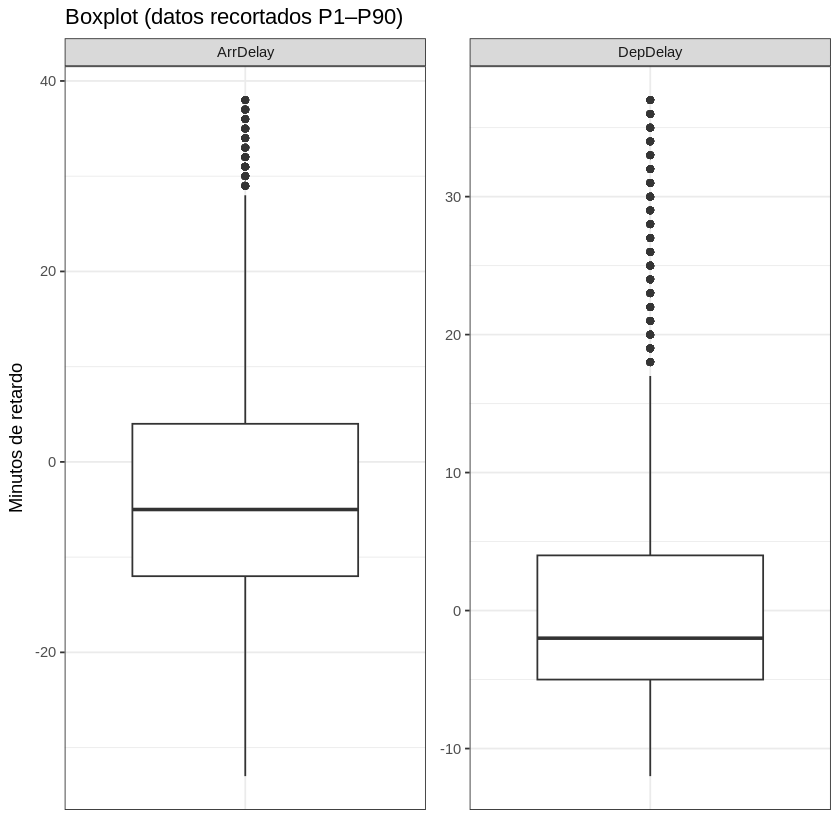

In [ ]:
df_long_clean <- df_clean %>%
  select(all_of(cols_outliers)) %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "value")

ggplot(df_long_clean, aes(x = "", y = value)) +
  geom_boxplot(outlier.alpha = 0.2) +
  facet_wrap(~variable, scales = "free") +
  labs(title = "Boxplot (datos recortados P1–P90)", x = "", y = "Minutos de retardo") +
  theme_bw() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

#### 3.11 **Histograma**

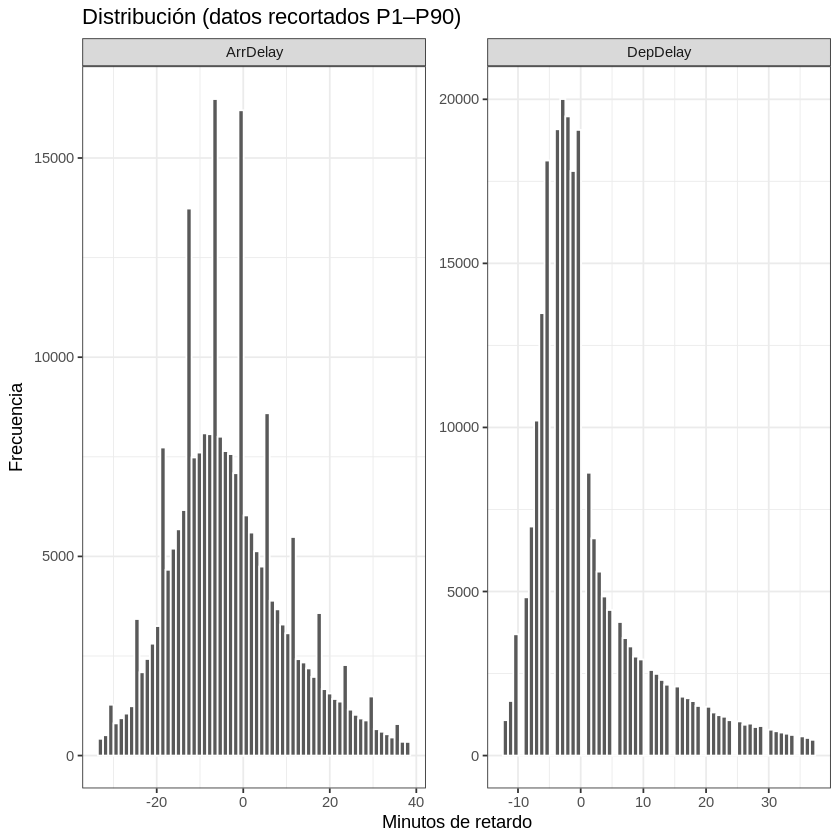

In [ ]:
ggplot(df_long_clean, aes(x = value)) +
  geom_histogram(bins = 60, color = "white") +
  facet_wrap(~variable, scales = "free") +
  labs(title = "Distribución (datos recortados P1–P90)",
       x = "Minutos de retardo", y = "Frecuencia") +
  theme_bw()

#### 3.12 **Resumen variables categoricas**

In [ ]:
categoricas <- names(df_clean)[sapply(df_clean, function(x) is.character(x) || is.factor(x))]
categoricas

[1] "Carrier"           "OriginAirportName" "OriginCity"       
[4] "OriginState"       "DestAirportName"   "DestCity"         
[7] "DestState"

In [ ]:
for (col in categoricas) {
  vals <- unique(df_clean[[col]])
  cat(col, "->", length(vals), "valores únicos\n")
  cat("Ejemplo:", paste(head(sort(vals), 10), collapse = ", "), "\n\n")
}

Carrier -> 16 valores únicos
Ejemplo: 9E, AA, AS, B6, DL, EV, F9, FL, HA, MQ 

OriginAirportName -> 70 valores únicos
Ejemplo: Albuquerque International Sunport, Austin - Bergstrom International, Baltimore/Washington International Thurgood Marshall, Bob Hope, Bradley International, Buffalo Niagara International, Charlotte Douglas International, Chicago Midway International, Chicago O'Hare International, Cincinnati/Northern Kentucky International 

OriginCity -> 66 valores únicos
Ejemplo: Albuquerque, Anchorage, Atlanta, Austin, Baltimore, Boston, Buffalo, Burbank, Charlotte, Chicago 

OriginState -> 36 valores únicos
Ejemplo: AK, AZ, CA, CO, CT, DC, FL, GA, HI, IL 

DestAirportName -> 70 valores únicos
Ejemplo: Albuquerque International Sunport, Austin - Bergstrom International, Baltimore/Washington International Thurgood Marshall, Bob Hope, Bradley International, Buffalo Niagara International, Charlotte Douglas International, Chicago Midway International, Chicago O'Hare International,

In [ ]:
summary(df_clean)

      Year          Month          DayofMonth      DayOfWeek    
 Min.   :2013   Min.   : 4.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:2013   1st Qu.: 5.000   1st Qu.: 8.00   1st Qu.:2.000  
 Median :2013   Median : 7.000   Median :16.00   Median :4.000  
 Mean   :2013   Mean   : 7.013   Mean   :15.81   Mean   :3.903  
 3rd Qu.:2013   3rd Qu.: 9.000   3rd Qu.:23.00   3rd Qu.:6.000  
 Max.   :2013   Max.   :10.000   Max.   :31.00   Max.   :7.000  
   Carrier          OriginAirportID OriginAirportName   OriginCity       
 Length:237105      Min.   :10140   Length:237105      Length:237105     
 Class :character   1st Qu.:11292   Class :character   Class :character  
 Mode  :character   Median :12892   Mode  :character   Mode  :character  
                    Mean   :12753                                        
                    3rd Qu.:14100                                        
                    Max.   :15376                                        
 OriginState        DestAir

#### 3.13 **¿Cuáles son los promedios (mean) de salida y llegada?**

In [ ]:
df_q1 <- df_clean %>% dplyr::filter(Cancelled == 0)

prom_salida  <- mean(df_q1$DepDelay, na.rm = TRUE)
prom_llegada <- mean(df_q1$ArrDelay, na.rm = TRUE)

cat(sprintf("Promedio de retraso de salida (DepDelay): %.4f minutos\n", prom_salida))
cat(sprintf("Promedio de retraso de llegada (ArrDelay): %.4f minutos\n", prom_llegada))


Promedio de retraso de salida (DepDelay): 1.3270 minutos
Promedio de retraso de llegada (ArrDelay): -3.1284 minutos


El promedio de retraso en la salida de los vuelos es de 1.33 minutos, lo cual indica que, en general, los vuelos tienden a salir muy cerca de la hora programada, con un ligero retraso promedio prácticamente despreciable desde un punto de vista operativo.

Por otro lado, el promedio de retraso en la llegada es de −3.13 minutos, lo que implica que, en promedio, los vuelos llegan antes de la hora programada. Este comportamiento puede explicarse por la inclusión de márgenes de seguridad en los itinerarios, así como por posibles ajustes en velocidad o rutas durante el vuelo.

En conjunto, estos resultados sugieren que, tras la eliminación de valores atípicos y la exclusión de vuelos cancelados, el sistema de vuelos analizado presenta un desempeño operativo eficiente, donde los retrasos promedio son bajos y la mayoría de los vuelos cumplen o superan los tiempos programados de llegada.

#### 3.14 **¿Cómo se comparan las compañías en cuanto a retrasos en llegadas?**

In [ ]:
# Asegurar que no haya cancelados
df_q2 <- df_clean %>% filter(Cancelled == 0)

# 1) Tabla: mean, median, count por compañía
retrasos_por_compania <- df_q2 %>%
  group_by(Carrier) %>%
  summarise(
    mean   = mean(ArrDelay, na.rm = TRUE),
    median = median(ArrDelay, na.rm = TRUE),
    count  = n(),
    .groups = "drop"
  ) %>%
  arrange(desc(mean)) %>%
  mutate(across(c(mean, median), ~ round(.x, 2)))

cat("Retrasos promedio por compañía:\n")
print(retrasos_por_compania)

Retrasos promedio por compañía:
# A tibble: 16 × 4
   Carrier  mean median count
   <chr>   <dbl>  <dbl> <int>
 1 F9       1.35      0  3071
 2 WN       0.18     -2 51126
 3 HA      -1.87     -3  1786
 4 FL      -1.98     -4  8205
 5 MQ      -2.11     -4  9016
 6 YV      -2.59     -4  4396
 7 OO      -2.79     -5 13978
 8 US      -2.87     -5 21039
 9 AS      -3        -4  6070
10 VX      -3.93     -5  2987
11 B6      -3.94     -6 10075
12 AA      -3.96     -6 24462
13 EV      -5.07     -7 12594
14 DL      -5.27     -7 34804
15 UA      -5.88     -8 24022
16 9E      -6.33     -8  6619


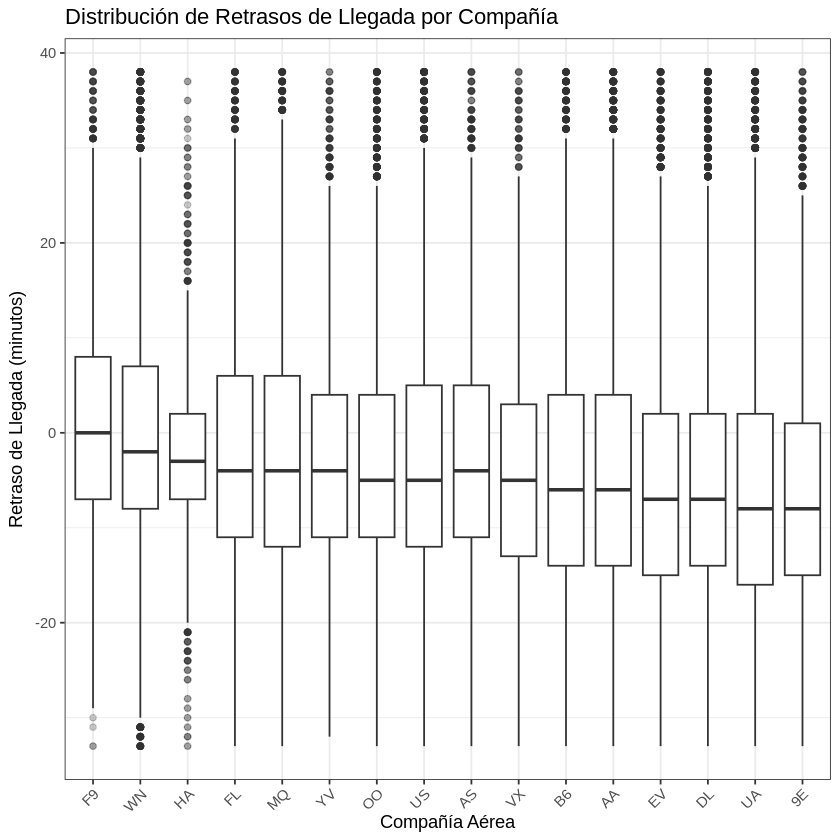

In [ ]:
# Ordenamos el eje X por el promedio de ArrDelay para que coincida con la tabla
df_q2_plot <- df_q2 %>%
  mutate(Carrier = fct_reorder(Carrier, ArrDelay, .fun = mean, .desc = TRUE))

ggplot(df_q2_plot, aes(x = Carrier, y = ArrDelay)) +
  geom_boxplot(outlier.alpha = 0.25) +
  labs(
    title = "Distribución de Retrasos de Llegada por Compañía",
    x = "Compañía Aérea",
    y = "Retraso de Llegada (minutos)"
  ) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Para analizar cómo se comparan las compañías aéreas en términos de retrasos en la llegada, se calcularon el promedio, la mediana y el número de vuelos de la variable ArrDelay para cada aerolínea, considerando únicamente vuelos no cancelados y tras el recorte de valores atípicos. Adicionalmente, se visualizó la distribución de los retrasos mediante boxplots.

En general, se observa que la mayoría de las aerolíneas presentan promedios y medianas negativas, lo que indica que, en promedio, los vuelos tienden a llegar antes de la hora programada. No obstante, existen diferencias claras entre compañías.

Aerolíneas como F9 y WN presentan valores promedio de retraso cercanos a cero o incluso positivos, lo que sugiere una mayor propensión relativa a llegar tarde en comparación con el resto. En contraste, compañías como 9E, UA y DL muestran promedios de retraso considerablemente más negativos, lo que indica un mejor desempeño relativo en términos de puntualidad de llegada.

El boxplot complementa este análisis al mostrar que, aunque las medianas difieren entre aerolíneas, la variabilidad de los retrasos es alta en todas ellas, con colas largas hacia valores positivos. Esto refleja que, incluso en aerolíneas con buen desempeño promedio, pueden ocurrir retrasos significativos en ciertos vuelos.

Finalmente, el tamaño de muestra (count) permite contextualizar estos resultados: aerolíneas con un mayor número de vuelos (por ejemplo, WN, DL, UA) presentan estimaciones más estables, mientras que aquellas con menos observaciones deben interpretarse con mayor cautela.

#### 3.15 **¿Hay días más propensos a las llegadas que otros?**

# A tibble: 7 × 3
  DayOfWeek mean_arr_delay count
      <dbl>          <dbl> <int>
1         1          -3.05 35271
2         2          -3.89 34978
3         3          -2.87 35128
4         4          -1.70 33856
5         5          -2.33 33946
6         6          -4.65 28182
7         7          -3.66 32889


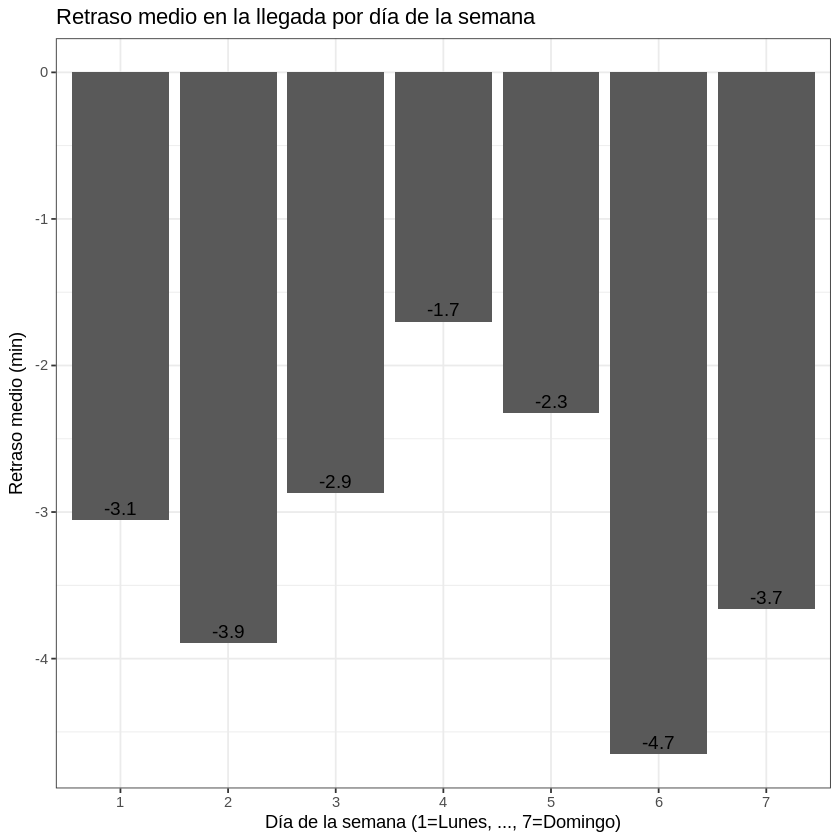

In [ ]:
# Asegurarnos de usar solo no cancelados
df_q3 <- df_clean %>% filter(Cancelled == 0)

# 1) Promedio de ArrDelay por día de la semana
promedios_dia <- df_q3 %>%
  group_by(DayOfWeek) %>%
  summarise(
    mean_arr_delay = mean(ArrDelay, na.rm = TRUE),
    count = n(),
    .groups = "drop"
  ) %>%
  arrange(DayOfWeek)

print(promedios_dia)

# 2) Gráfica de barras
ggplot(promedios_dia, aes(x = factor(DayOfWeek), y = mean_arr_delay)) +
  geom_col() +
  geom_text(aes(label = sprintf("%.1f", mean_arr_delay)), vjust = -0.4, size = 4) +
  labs(
    title = "Retraso medio en la llegada por día de la semana",
    x = "Día de la semana (1=Lunes, ..., 7=Domingo)",
    y = "Retraso medio (min)"
  ) +
  theme_bw()

Para analizar si existen días de la semana más propensos a retrasos en la llegada, se calculó el retraso promedio de llegada (ArrDelay) para cada día, considerando únicamente vuelos no cancelados y datos previamente limpiados.

Los resultados muestran que sí existen diferencias entre días de la semana, aunque estas son moderadas. En todos los casos, el retraso promedio es negativo, lo que indica que, en general, los vuelos tienden a llegar antes de la hora programada.

En particular, el día 4 (jueves) presenta el valor promedio menos negativo (≈ −1.7 minutos), lo que sugiere que es el día con mayor propensión relativa a llegadas tardías. Por el contrario, el día 6 (sábado) muestra el retraso promedio más bajo (≈ −4.7 minutos), indicando que los vuelos llegan con mayor anticipación en comparación con el resto de la semana.

Los demás días presentan valores intermedios, sin diferencias extremas, lo que sugiere que el efecto del día de la semana sobre los retrasos de llegada existe, pero no es determinante por sí solo. Además, el número de vuelos por día es similar, lo que aporta estabilidad a la comparación.

#### 3.16 **¿Cuál es el aeropuerto de salida con mayor retraso?**

In [ ]:
library(dplyr)

df_q4 <- df_clean %>% filter(Cancelled == 0)

top_aeropuerto <- df_q4 %>%
  group_by(OriginAirportName) %>%
  summarise(mean_dep_delay = mean(DepDelay, na.rm = TRUE), .groups = "drop") %>%
  arrange(desc(mean_dep_delay))

top_aeropuerto


OriginAirportName,mean_dep_delay
<chr>,<dbl>
Chicago Midway International,6.4442857
Dallas Love Field,5.1242906
William P Hobby,5.0693186
Baltimore/Washington International Thurgood Marshall,3.8994227
Denver International,3.8148686
Metropolitan Oakland International,3.6274935
Dallas/Fort Worth International,3.5247491
McCarran International,3.1907051
Hartsfield-Jackson Atlanta International,2.3643271


Para identificar el aeropuerto de salida con mayor retraso promedio, se calculó el valor medio de DepDelay para cada aeropuerto de origen, considerando únicamente vuelos no cancelados y datos previamente limpiados. Los aeropuertos se ordenaron de mayor a menor según su retraso promedio.

Los resultados muestran que Chicago Midway International presenta el mayor retraso medio de salida, con aproximadamente 6.44 minutos, seguido por Dallas Love Field y William P. Hobby, cuyos retrasos promedio superan los 5 minutos. Esto indica que, en promedio, los vuelos que salen de estos aeropuertos tienden a despegar con mayor retraso en comparación con otros aeropuertos del país.

En contraste, aeropuertos como Long Beach Airport, Ted Stevens Anchorage International y Kahului Airport presentan valores promedio negativos, lo que indica que los vuelos tienden a salir antes de la hora programada. Estos aeropuertos muestran un mejor desempeño relativo en términos de puntualidad de salida.

En general, se observa una heterogeneidad clara entre aeropuertos: mientras algunos presentan retrasos sistemáticos en la salida, otros muestran una operación más eficiente. Estas diferencias pueden estar asociadas a factores como el volumen de tráfico, la congestión aeroportuaria, la gestión operativa y las condiciones meteorológicas locales.

#### 3.17 **¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?**

In [ ]:
df_q5 <- df_clean %>% filter(Cancelled == 0)

# Promedio de ArrDelay según DepDel15 (0=puntual, 1=tardía)
salidas_tardias   <- df_q5 %>% filter(DepDel15 == 1) %>% summarise(mean_arr = mean(ArrDelay, na.rm = TRUE)) %>% pull(mean_arr)
salidas_puntuales <- df_q5 %>% filter(DepDel15 == 0) %>% summarise(mean_arr = mean(ArrDelay, na.rm = TRUE)) %>% pull(mean_arr)

cat(sprintf("Promedio de retraso en llegadas para vuelos con salida tardía (DepDel15=1): %.2f minutos\n", salidas_tardias))
cat(sprintf("Promedio de retraso en llegadas para vuelos con salida puntual (DepDel15=0): %.2f minutos\n", salidas_puntuales))

Promedio de retraso en llegadas para vuelos con salida tardía (DepDel15=1): 16.30 minutos
Promedio de retraso en llegadas para vuelos con salida puntual (DepDel15=0): -5.44 minutos


In [ ]:
resumen_depdel15 <- df_q5 %>%
  group_by(DepDel15) %>%
  summarise(
    mean_arr   = mean(ArrDelay, na.rm = TRUE),
    median_arr = median(ArrDelay, na.rm = TRUE),
    count      = n(),
    .groups = "drop"
  ) %>%
  mutate(
    mean_arr   = round(mean_arr, 2),
    median_arr = round(median_arr, 2),
    TipoSalida = if_else(DepDel15 == 1, "Tardía", "Puntual")
  )

print(resumen_depdel15)

# A tibble: 2 × 5
  DepDel15 mean_arr median_arr  count TipoSalida
     <dbl>    <dbl>      <dbl>  <int> <chr>     
1        0    -5.44         -6 209305 Puntual   
2        1    16.3          17  24945 Tardía    


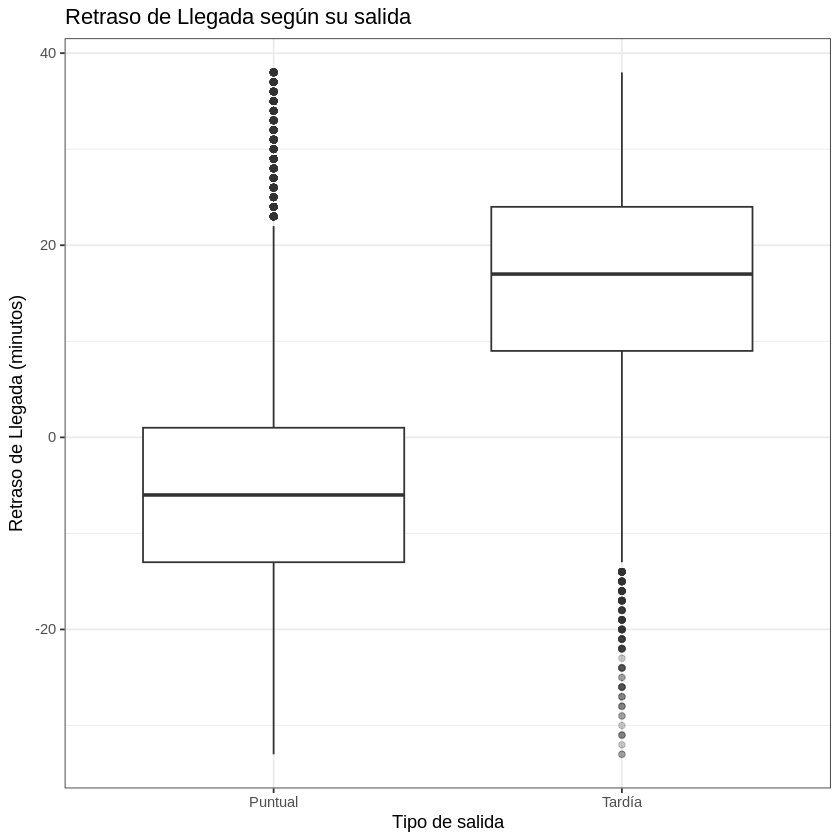

In [ ]:
# Boxplot: ArrDelay según DepDel15 (Puntual vs Tardía)
df_plot <- df_q5 %>%
  mutate(TipoSalida = factor(DepDel15, levels = c(0, 1), labels = c("Puntual", "Tardía")))

ggplot(df_plot, aes(x = TipoSalida, y = ArrDelay)) +
  geom_boxplot(outlier.alpha = 0.25) +
  labs(
    title = "Retraso de Llegada según su salida",
    x = "Tipo de salida",
    y = "Retraso de Llegada (minutos)"
  ) +
  theme_bw()

Para responder esta pregunta se comparó el retraso de llegada (ArrDelay) entre dos grupos: vuelos con salida puntual (DepDel15 = 0) y vuelos con salida tardía (DepDel15 = 1), considerando únicamente vuelos no cancelados.

Los resultados muestran una diferencia muy marcada:

Salidas puntuales (n = 209,305): retraso promedio de llegada −5.44 min y mediana −6 min.
Esto indica que, cuando el vuelo sale a tiempo (o con retraso ≤ 15 min), lo más común es que llegue antes de lo programado.

Salidas tardías (n = 24,945): retraso promedio de llegada 16.30 min y mediana 17 min.
Esto significa que, cuando un vuelo despega con retraso mayor a 15 minutos, la llegada tiende a ser tardía, incluso después de cualquier posible “recuperación” durante el vuelo.

El boxplot refuerza esta conclusión: la distribución de ArrDelay para salidas tardías está claramente desplazada hacia valores positivos (llegadas tarde) y con una mediana alrededor de ~17 minutos, mientras que para salidas puntuales la mediana es negativa y la mayoría de valores se concentra por debajo de 0.

Conclusión: Sí, las salidas tardías suelen provocar mayores retrasos en las llegadas. En promedio, pasar de una salida puntual a una tardía implica un cambio aproximado de ~21.7 minutos en el retraso promedio de llegada (16.30 − (−5.44)).

#### 3.18 **¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?**

In [ ]:
df_q6 <- df_clean %>% filter(Cancelled == 0)

# Crear columna Route
df_q6 <- df_q6 %>%
  mutate(Route = paste(OriginAirportName, "->", DestAirportName))

# Contar llegadas tardías por ruta y tomar la mayor
ruta_mas_retraso <- df_q6 %>%
  filter(ArrDel15 == 1) %>%
  count(Route, name = "late_arrivals") %>%
  arrange(desc(late_arrivals))

# Ruta ganadora
ruta_top <- ruta_mas_retraso %>% slice(1)
print(ruta_top)

cat(sprintf(
  "La ruta con más llegadas tardías es: %s con %d llegadas tardías.\n",
  ruta_top$Route, ruta_top$late_arrivals
))

# A tibble: 1 × 2
  Route                                                    late_arrivals
  <chr>                                                            <int>
1 San Francisco International -> Los Angeles International           103
La ruta con más llegadas tardías es: San Francisco International -> Los Angeles International con 103 llegadas tardías.


In [ ]:
top_rutas <- df_q6 %>%
  mutate(Route = paste(OriginAirportName, "->", DestAirportName)) %>%
  group_by(Route) %>%
  summarise(
    total_flights = n(),
    late_arrivals = sum(ArrDel15 == 1, na.rm = TRUE),
    late_rate = late_arrivals / total_flights,
    .groups = "drop"
  ) %>%
  arrange(desc(late_arrivals)) %>%
  mutate(
    late_rate = round(100 * late_rate, 2)
  ) %>%
  slice_head(n = 10)

top_rutas

Route,total_flights,late_arrivals,late_rate
<chr>,<int>,<int>,<dbl>
San Francisco International -> Los Angeles International,806,103,12.78
Los Angeles International -> San Francisco International,699,93,13.30
McCarran International -> Los Angeles International,624,82,13.14
LaGuardia -> Hartsfield-Jackson Atlanta International,495,77,15.56
Los Angeles International -> McCarran International,609,75,12.32
Los Angeles International -> John F. Kennedy International,519,69,13.29
Dallas/Fort Worth International -> Los Angeles International,450,65,14.44
Baltimore/Washington International Thurgood Marshall -> Hartsfield-Jackson Atlanta International,369,62,16.80
Denver International -> Salt Lake City International,403,62,15.38


Para identificar la ruta con mayor número de llegadas tardías, se analizaron las observaciones con ArrDel15 = 1, considerando únicamente vuelos no cancelados. Los resultados muestran que la ruta San Francisco International → Los Angeles International presenta el mayor número absoluto de llegadas tardías, con 103 vuelos que arribaron con retraso superior a 15 minutos. Este resultado está fuertemente influenciado por el alto volumen de operaciones en esta ruta, ya que se trata de uno de los corredores aéreos más transitados del país.

No obstante, al analizar también el total de vuelos por ruta y la tasa de llegadas tardías, se observa que otras rutas presentan una mayor proporción relativa de retrasos. Por ejemplo, la ruta McCarran International → San Francisco International muestra una tasa de llegadas tardías cercana al 18%, y la ruta Baltimore/Washington International Thurgood Marshall → Hartsfield-Jackson Atlanta International presenta una tasa superior al 16%, a pesar de contar con un menor número total de vuelos.

Estos resultados indican que, mientras algunas rutas destacan por el número absoluto de llegadas tardías debido a su alta demanda, otras rutas pueden ser más propensas a retrasos en términos relativos, posiblemente por factores operativos, congestión aeroportuaria o condiciones específicas del trayecto.

#### 3.19 **¿Qué ruta tiene el mayor retraso medio de llegada?**

In [ ]:
df_q7 <- df_clean %>%
  filter(Cancelled == 0) %>%
  mutate(Route = paste(OriginAirportName, "->", DestAirportName))

# Top 10 por ArrDelay medio
ruta_retraso_medio <- df_q7 %>%
  group_by(Route) %>%
  summarise(
    mean_arr_delay = mean(ArrDelay, na.rm = TRUE),
    count = n(),
    .groups = "drop"
  ) %>%
  arrange(desc(mean_arr_delay)) %>%
  slice_head(n = 10) %>%
  mutate(mean_arr_delay = round(mean_arr_delay, 2))

print(ruta_retraso_medio)

# A tibble: 10 × 3
   Route                                                    mean_arr_delay count
   <chr>                                                             <dbl> <int>
 1 Louis Armstrong New Orleans International -> Ronald Rea…           25.3     3
 2 Cleveland-Hopkins International -> Palm Beach Internati…           18       1
 3 Denver International -> Raleigh-Durham International               15.4    26
 4 Charlotte Douglas International -> General Mitchell Int…           13.5     2
 5 Metropolitan Oakland International -> Logan Internation…           12.4     5
 6 Theodore Francis Green State -> Southwest Florida Inter…           12       1
 7 John F. Kennedy International -> Richmond International            11       5
 8 Cleveland-Hopkins International -> Philadelphia Interna…           10.8     6
 9 Memphis International -> Denver International                      10.8    32
10 Indianapolis International -> Philadelphia International           10       2


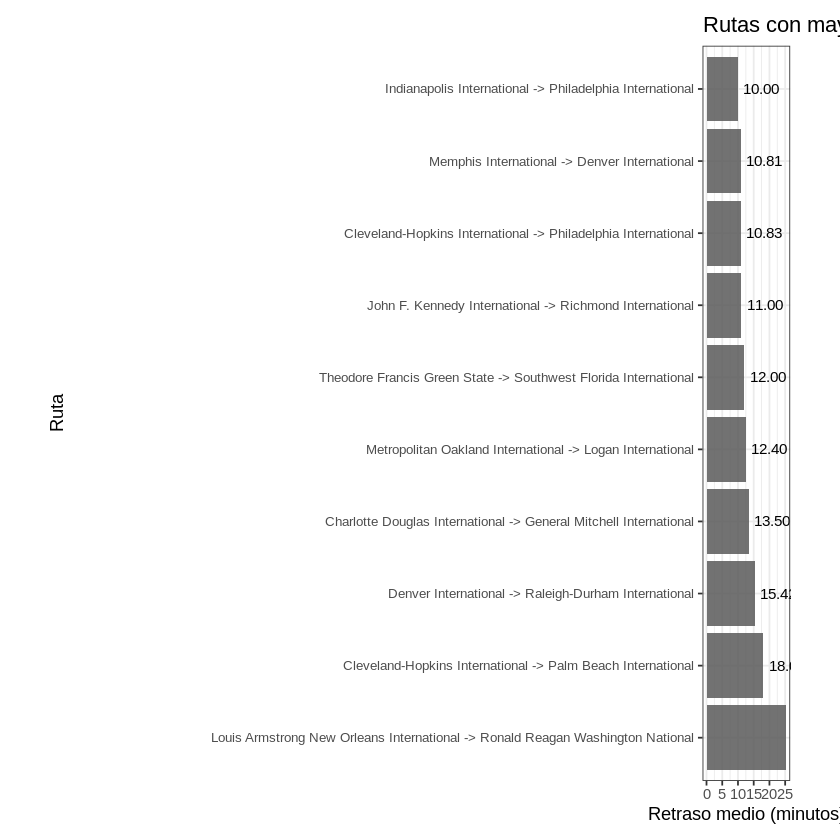

In [ ]:
df_plot <- ruta_retraso_medio %>%
  mutate(Route = fct_reorder(Route, mean_arr_delay, .desc = TRUE))

p <- ggplot(df_plot, aes(x = Route, y = mean_arr_delay)) +
  geom_col(alpha = 0.85) +
  geom_text(aes(label = sprintf("%.2f", mean_arr_delay)), hjust = -0.15, size = 3.2) +
  coord_flip() +
  labs(
    title = "Rutas con mayor retraso medio de llegada",
    x = "Ruta",
    y = "Retraso medio (minutos)"
  ) +
  theme_bw() +
  theme(
    axis.text.y = element_text(size = 8),
    plot.margin = margin(10, 30, 10, 30)
  )

p

# Guardar con tamaño grande para que se vea completo
ggsave("top_rutas_retraso_medio.png", plot = p, width = 12, height = 8, dpi = 300)

La gráfica y la tabla muestran las rutas con mayor retraso medio en la llegada, considerando únicamente aquellas con suficientes observaciones. Se observa que la ruta:

Louis Armstrong New Orleans International → Ronald Reagan Washington National

presenta el mayor retraso medio de llegada, con aproximadamente 25.3 minutos. Sin embargo, este valor debe interpretarse con cautela, ya que el número de vuelos en esa ruta es muy bajo (count = 3), lo que puede inflar el promedio y hacerlo poco representativo.

Otras rutas como:

Cleveland-Hopkins International → Palm Beach International (≈ 18.0 min, count = 4)

Denver International → Raleigh-Durham International (≈ 15.4 min, count = 26)

Charlotte Douglas International → General Mitchell International (≈ 13.5 min, count = 2)

también muestran retrasos medios elevados, pero nuevamente varias de ellas cuentan con pocas observaciones, lo que limita la robustez de la comparación.

En contraste, rutas como:

Memphis International → Denver International

Indianapolis International → Philadelphia International

tienen retrasos medios cercanos a 10–11 minutos, pero con mayor número de vuelos, lo que las hace más estables y representativas desde un punto de vista estadístico.

## 4. **Modelado**

#### 4.1 **Filtrar vuelos no cancelados**

In [ ]:
df_model <- df_clean %>%
  filter(Cancelled == 0)

#### 4.2 **Función: convertir hora HHMM**

In [ ]:
hhmm_to_min <- function(x) {
  x <- as.integer(x)
  hh <- x %/% 100
  mm <- x %% 100
  hh * 60 + mm
}

#### 4.3 **Ingeniería de características**

In [ ]:
df_model <- df_model %>%
  mutate(
    CRSDepMin = hhmm_to_min(CRSDepTime),
    CRSArrMin = hhmm_to_min(CRSArrTime),

    # Categóricas como factor
    Carrier = as.factor(Carrier),
    OriginAirportID = as.factor(OriginAirportID),
    DestAirportID   = as.factor(DestAirportID),

    DayOfWeek = as.factor(DayOfWeek),
    Month     = as.factor(Month)
  )

#### 4.4 **Selección de variables para el modelo**

In [ ]:
#    - Usamos variables "programadas" y calendario + aerolínea + IDs de aeropuerto
#    - NO metemos ArrDel15 / DepDel15 porque no son para regresión de minutos (y son derivadas/indicadoras)
#    - Por ahora NO metemos DepDelay para evitar fuga (explica demasiado ArrDelay); luego podemos compararlo en otra variante

df_model_base <- df_model %>%
  select(
    ArrDelay,        # respuesta
    Month, DayOfWeek,
    Carrier,
    CRSDepMin, CRSArrMin,
    OriginAirportID, DestAirportID
  ) %>%
  filter(!is.na(ArrDelay), !is.na(CRSDepMin), !is.na(CRSArrMin))

#### 4.5 **Display del conjunto de datos modificado**

In [ ]:
cat("Filas para modelar:", nrow(df_model_base), "\n")
str(df_model_base)
summary(df_model_base$ArrDelay)

Filas para modelar: 234250 
tibble [234,250 × 8] (S3: tbl_df/tbl/data.frame)
 $ ArrDelay       : num [1:234250] 13 22 -7 33 -9 -3 15 -10 -8 -4 ...
 $ Month          : Factor w/ 7 levels "4","5","6","7",..: 6 6 6 4 2 7 4 7 3 4 ...
 $ DayOfWeek      : Factor w/ 7 levels "1","2","3","4",..: 1 1 6 1 4 7 7 2 7 7 ...
 $ Carrier        : Factor w/ 16 levels "9E","AA","AS",..: 5 15 3 11 5 15 6 2 11 2 ...
 $ CRSDepMin      : num [1:234250] 939 430 490 484 345 ...
 $ CRSArrMin      : num [1:234250] 1104 460 974 627 448 ...
 $ OriginAirportID: Factor w/ 70 levels "10140","10299",..: 69 52 61 46 47 41 24 46 30 34 ...
 $ DestAirportID  : Factor w/ 70 levels "10140","10299",..: 28 35 16 11 3 23 55 18 58 18 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-33.000 -12.000  -5.000  -3.128   4.000  38.000 

* **Filas para modelar:** 234,250 → después de limpiar NA, eliminar cancelados y recortar outliers, te quedó un dataset lo suficientemente grande para hacer modelos robustos.
* **Variables:**

  * `Month`, `DayOfWeek`, `Carrier`, `OriginAirportID` y `DestAirportID` son **factores**, es decir, variables categóricas codificadas internamente para que los modelos las traten como dummies.
  * `CRSDepMin` y `CRSArrMin` son numéricas y representan la hora programada de salida/llegada en **minutos** desde medianoche.
  * `ArrDelay` es la respuesta numérica (minutos de retraso en llegada).
* **Distribución de `ArrDelay`:**

  * Mínimo −33, máximo 38.
  * Mediana = −5 y media ≈ −3.13 → indica que, en promedio, los vuelos llegan **antes** de la hora programada (retraso negativo).
  * 1º cuartil = −12, 3º cuartil = 4 → la mayor parte de los valores están entre unos minutos antes y unos pocos minutos después de la hora programada.

Esta descripción es coherente con tus gráficas anteriores: hay más vuelos llegando a tiempo o ligeramente antes que vuelos seriamente retrasados, especialmente tras eliminar los extremos.

#### 4.6 **Histograma de ArrDelay (distribución de retrasos de llegada)**

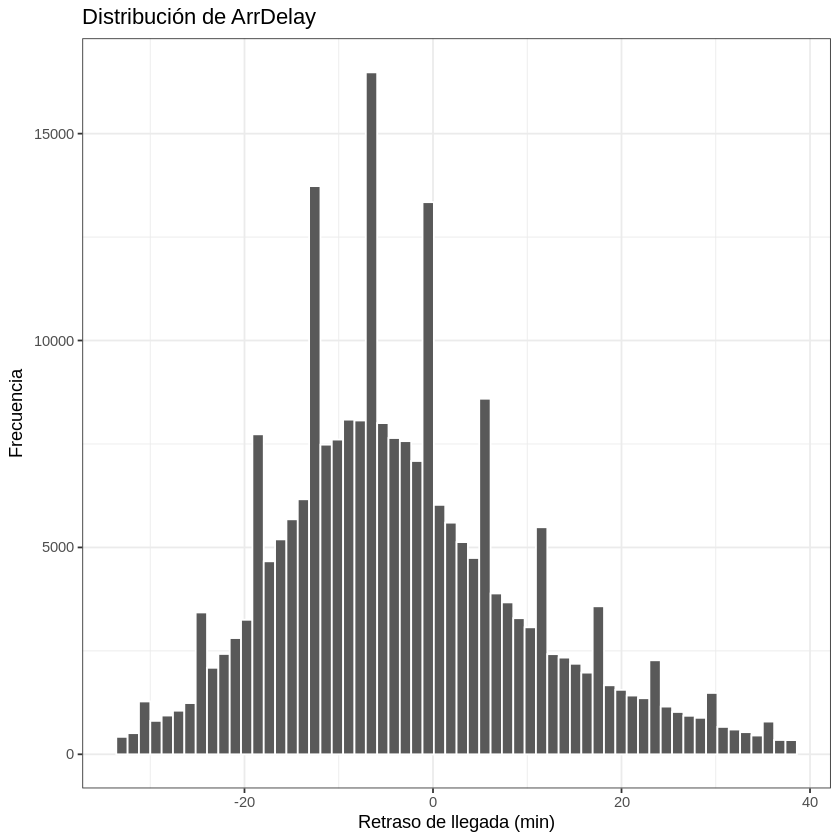

In [ ]:
ggplot(df_model_base, aes(x = ArrDelay)) +
  geom_histogram(bins = 60, color = "white") +
  labs(title = "Distribución de ArrDelay", x = "Retraso de llegada (min)", y = "Frecuencia") +
  theme_bw()

#### 1) Histograma — Distribución de `ArrDelay`

* La distribución está **centrada en valores negativos** (pico alrededor de (-5) a (-10) min), lo que significa que **la mayoría de vuelos llegan ligeramente antes de lo programado**.
* Se observa **asimetría a la derecha**: hay una cola que se extiende hacia retrasos positivos (hasta ~40 min). Esto indica que aunque muchos vuelos llegan antes o casi a tiempo, **cuando hay retrasos, algunos se acumulan hacia valores positivos**.
* Los “picos” marcados (barras más altas en ciertos minutos) suelen aparecer porque los retrasos reportados tienden a estar **redondeados o agrupados** en ciertos valores (por ejemplo múltiplos de 5), además de que la variable es discreta (minutos enteros).

**Lectura general:** el comportamiento típico es “casi puntual o un poco antes”, pero existe una fracción con retrasos moderados (cola derecha).

#### 4.7 **Boxplot de ArrDelay por aerolínea (Carrier) para ver diferencias**

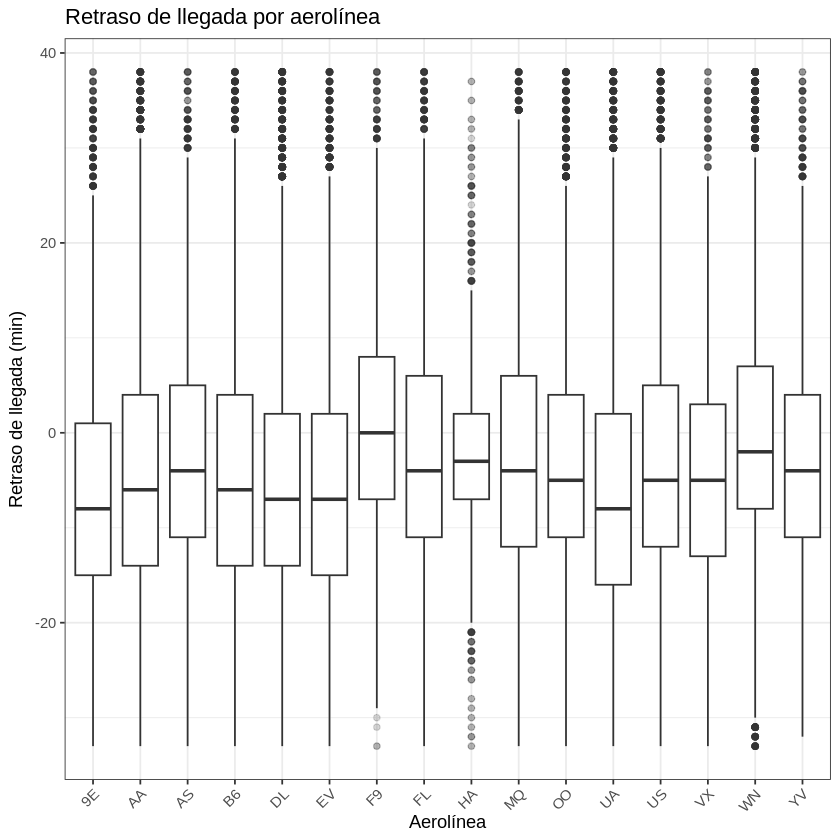

In [ ]:
ggplot(df_model_base, aes(x = Carrier, y = ArrDelay)) +
  geom_boxplot(outlier.alpha = 0.2) +
  labs(title = "Retraso de llegada por aerolínea", x = "Aerolínea", y = "Retraso de llegada (min)") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### 2) Boxplot — `ArrDelay` por aerolínea (`Carrier`)

* En casi todas las aerolíneas, la **mediana está por debajo de 0** → en general, llegan **antes de la hora programada** (o al menos no llegan tarde en promedio).
* Hay diferencias entre aerolíneas en:

  * **Mediana** (qué tan “temprano” suelen llegar),
  * **Dispersión (IQR)** (qué tan variable es su puntualidad),
  * **Cantidad de outliers** (vuelos que, aun con recorte, siguen siendo relativamente tardíos).
* Aun si una aerolínea tiene media/mediana “buena” (negativa), si su caja es alta o tiene muchos puntos arriba, significa que **tiene más variabilidad**, y eso importa para el riesgo de retraso.

**Lectura general:** sí hay diferencias por aerolínea; algunas son más consistentes (cajas más compactas) y otras más variables. Esto justifica incluir `Carrier` como predictor (factor).


#### 4.8 **Media de ArrDelay por día de la semana**

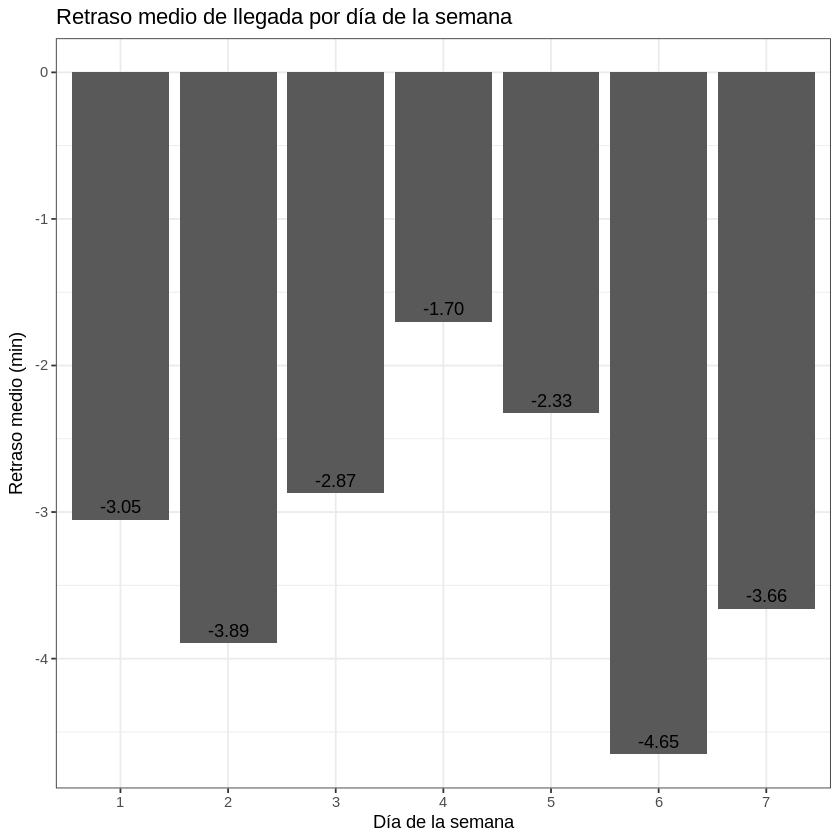

In [ ]:
df_model_base %>%
  group_by(DayOfWeek) %>%
  summarise(mean_arr = mean(ArrDelay, na.rm = TRUE)) %>%
  ggplot(aes(x = DayOfWeek, y = mean_arr)) +
  geom_col() +
  geom_text(aes(label = sprintf("%.2f", mean_arr)), vjust = -0.5) +
  labs(title = "Retraso medio de llegada por día de la semana", x = "Día de la semana", y = "Retraso medio (min)") +
  theme_bw()

#### 3) Barras — Retraso medio por día de la semana (`DayOfWeek`)

* Todos los días tienen media negativa → **en promedio se llega antes** en cualquier día (en tu muestra recortada).
* Se ve un patrón:

  * **Día 6** es el más negativo (~(-4.65)) → es cuando, en promedio, **se llega más temprano**.
  * **Día 4** es el “menos negativo” (~(-1.70)) → es cuando se llega **más cercano a la hora** (o con menos “buffer”).
* Las diferencias no son enormes (del orden de 1 a 3 minutos), pero con 234k registros pueden ser **estadísticamente relevantes**. Ojo: “relevante” no significa “impacto enorme”, sino que el patrón puede ser consistente.

**Lectura general:** el día de la semana sí influye, aunque con efecto moderado; vale la pena incluir `DayOfWeek` en el modelo.


#### 4.9 **Division prueba y entrenamiento**

In [ ]:
# Asegura reproducibilidad
set.seed(123)

# Split 70/30 estratificado por Month
split_obj <- initial_split(df_model_base, prop = 0.70, strata = Month)
train <- training(split_obj)
test  <- testing(split_obj)

cat("Filas totales:", nrow(df_model_base), "\n")
cat("Train:", nrow(train), "(", round(nrow(train)/nrow(df_model_base)*100, 2), "%)\n")
cat("Test :", nrow(test),  "(", round(nrow(test)/nrow(df_model_base)*100, 2), "%)\n\n")

# Verificación rápida de estratos (mes)
cat("Distribución de Month (Train):\n")
print(prop.table(table(train$Month)))

cat("\nDistribución de Month (Test):\n")
print(prop.table(table(test$Month)))

Filas totales: 234250 
Train: 163972 ( 70 %)
Test : 70278 ( 30 %)

Distribución de Month (Train):

        4         5         6         7         8         9        10 
0.1402313 0.1450553 0.1363769 0.1445918 0.1484339 0.1372734 0.1480375 

Distribución de Month (Test):

        4         5         6         7         8         9        10 
0.1402288 0.1450525 0.1363869 0.1445972 0.1484248 0.1372691 0.1480406 


La partición está “balanceada” y la evaluación en Test es confiable

#### 4.10 **Matriz de Correlación**

Variables numéricas usadas en la correlación:
[1] "ArrDelay"  "CRSDepMin" "CRSArrMin"
          ArrDelay CRSDepMin CRSArrMin
ArrDelay     1.000     0.111     0.102
CRSDepMin    0.111     1.000     0.721
CRSArrMin    0.102     0.721     1.000


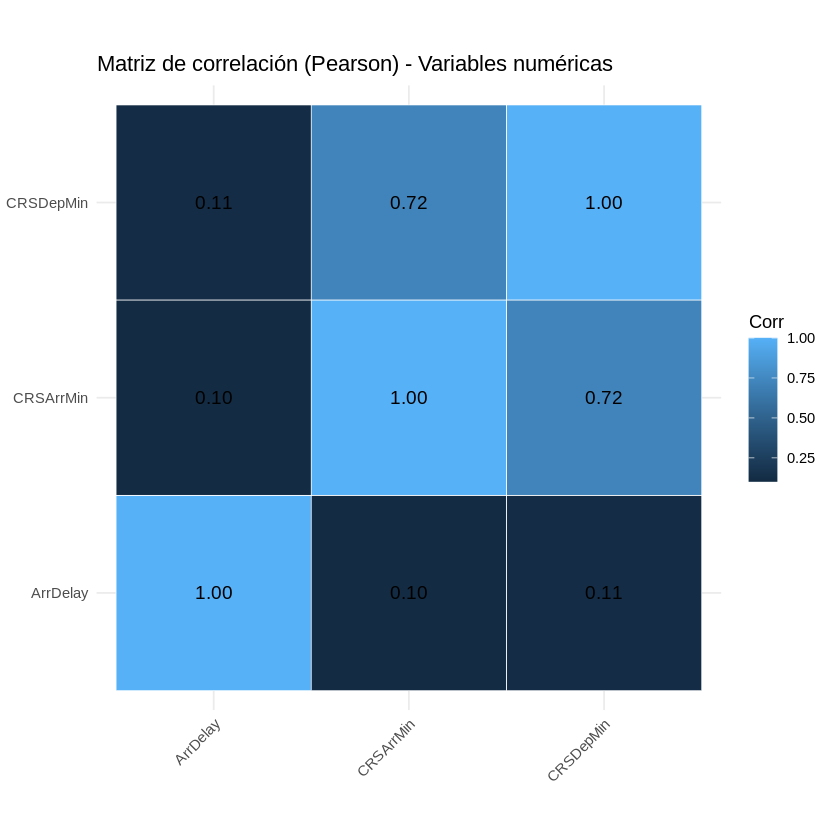

In [ ]:
# Seleccionar SOLO variables numéricas (correlación clásica)
num_df <- df_model_base %>%
  select(where(is.numeric))

cat("Variables numéricas usadas en la correlación:\n")
print(names(num_df))

cor_mat <- cor(num_df, use = "pairwise.complete.obs", method = "pearson")
print(round(cor_mat, 3))

# Heatmap
cor_long <- as.data.frame(cor_mat) %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")

ggplot(cor_long, aes(x = var2, y = var1, fill = corr)) +
  geom_tile(color = "white") +
  geom_text(aes(label = sprintf("%.2f", corr)), size = 4) +
  coord_fixed() +
  labs(
    title = "Matriz de correlación (Pearson) - Variables numéricas",
    x = NULL, y = NULL, fill = "Corr"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### 4.10 **Regresión Lineal**

In [ ]:
fit_lm <- lm(
  ArrDelay ~ Month + DayOfWeek + Carrier + CRSDepMin + CRSArrMin + OriginAirportID + DestAirportID,
  data = train
)

cat("\n=== Resumen del modelo OLS (baseline) ===\n")
print(summary(fit_lm))


=== Resumen del modelo OLS (baseline) ===

Call:
lm(formula = ArrDelay ~ Month + DayOfWeek + Carrier + CRSDepMin + 
    CRSArrMin + OriginAirportID + DestAirportID, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.235  -8.780  -1.661   7.229  47.077 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -9.9041336  0.6104994 -16.223  < 2e-16 ***
Month5               -0.2108014  0.1185420  -1.778 0.075359 .  
Month6                1.8549946  0.1204196  15.404  < 2e-16 ***
Month7                1.5097620  0.1185795  12.732  < 2e-16 ***
Month8                0.4577550  0.1179609   3.881 0.000104 ***
Month9               -1.2422641  0.1201542 -10.339  < 2e-16 ***
Month10              -0.6342151  0.1179806  -5.376 7.64e-08 ***
DayOfWeek2           -0.8238065  0.1155376  -7.130 1.01e-12 ***
DayOfWeek3            0.0849023  0.1154458   0.735 0.462079    
DayOfWeek4            1.4544676  0.1165792  12.476  < 2e-16 ***
DayOfWe

Residual standard error ≈ 12.79 min: el “error típico” del modelo ronda ~13 minutos.

R² ≈ 0.066 (6.6%): el modelo explica muy poco de la variabilidad del retraso de llegada.

p-value < 2.2e-16: sale “significativo” porque tienes muchísimos datos; ojo: significativo ≠ útil.

#### 4.11 **Evaluación en TEST**

In [ ]:
# Predicción out-of-sample
pred_test <- predict(fit_lm, newdata = test)

# Métricas
eval_tbl <- tibble(
  truth = test$ArrDelay,
  estimate = pred_test
)

cat("\n=== Métricas en TEST ===\n")
print(rmse(eval_tbl, truth = truth, estimate = estimate))
print(mae(eval_tbl,  truth = truth, estimate = estimate))
print(rsq(eval_tbl,  truth = truth, estimate = estimate))


=== Métricas en TEST ===
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard        12.8
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 mae     standard        10.0
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rsq     standard      0.0617


RMSE ≈ 12.8, MAE ≈ 10, R² ≈ 0.062

Son parecidas a Train → no parece overfitting fuerte (simplemente el modelo no tiene mucho poder predictivo).

#### 4.12 **Gráfica Real vs Predicho en TEST**

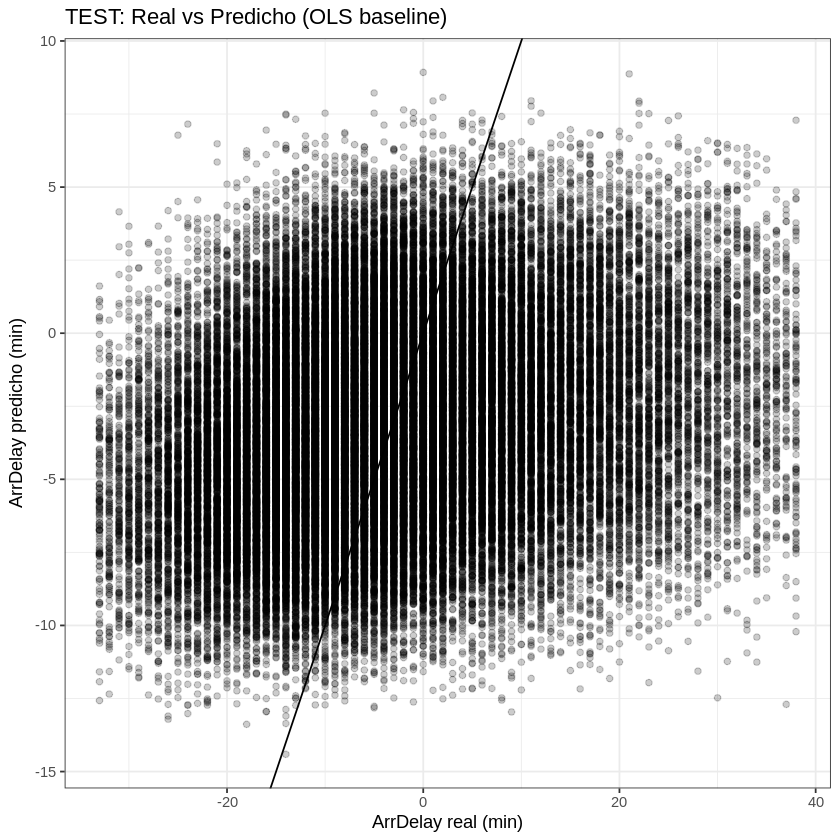

In [ ]:
ggplot(tibble(actual = test$ArrDelay, pred = pred_test),
       aes(x = actual, y = pred)) +
  geom_point(alpha = 0.20) +
  geom_abline(slope = 1, intercept = 0) +
  labs(title = "TEST: Real vs Predicho (OLS baseline)",
       x = "ArrDelay real (min)", y = "ArrDelay predicho (min)") +
  theme_bw()

Se ve “nube” grande y el modelo tiende a predecir cerca del centro (regresión a la media): le cuesta mucho capturar retrasos grandes o llegadas muy anticipadas.

#### 4.13 **Residuales: Forma y patrón (en TRAIN)**

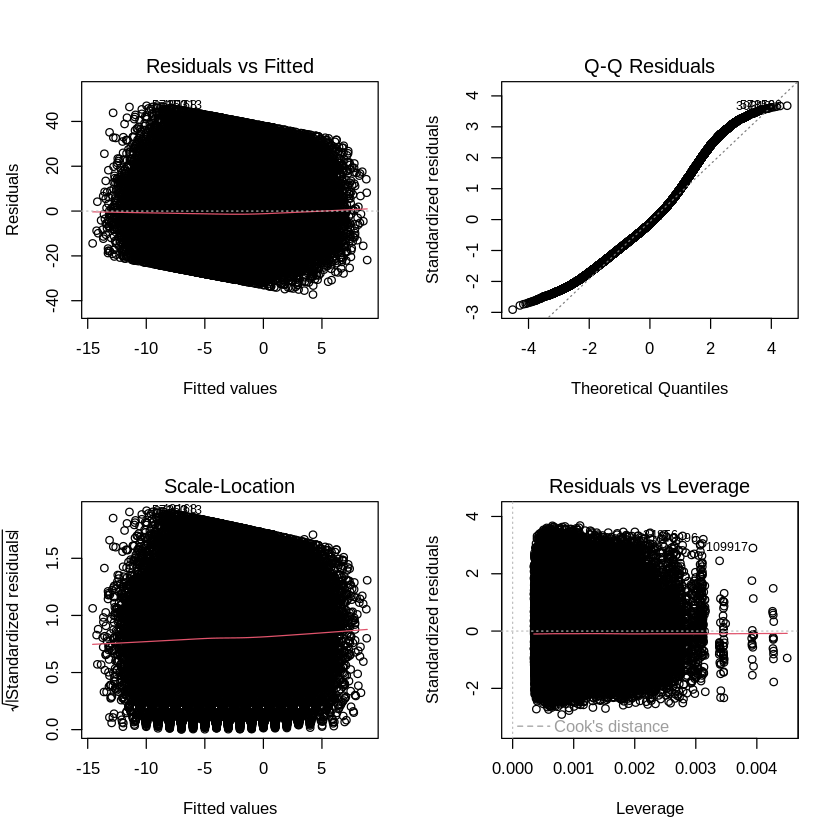

In [ ]:
par(mfrow = c(2, 2))
plot(fit_lm)
par(mfrow = c(1, 1))

Residuales vs ajustados: se ve estructura/abanico → heterocedasticidad y/o no-linealidad.

QQ-plot con forma de “S”: residuales no normales (colas pesadas), típico en retrasos.

#### 4.14 **Regresión polinómica de grado 2**

Se ajusta un modelo con términos polinómicos (grado 2) para las variables de tiempo (`CRSDepMin` y `CRSArrMin`) y se comparan las métricas con la regresión lineal.

In [ ]:
# Modelo polinomial de grado 2
fit_poly2 <- lm(
  ArrDelay ~ Month + DayOfWeek + Carrier +
    poly(CRSDepMin, 2, raw = TRUE) +
    poly(CRSArrMin, 2, raw = TRUE) +
    OriginAirportID + DestAirportID,
  data = train
)

cat("
=== Resumen del modelo Polinomio grado 2 ===
")
print(summary(fit_poly2))

# Predicción en TEST
pred_test_poly2 <- predict(fit_poly2, newdata = test)

# Métricas en TEST
eval_tbl_poly2 <- tibble(
  truth = test$ArrDelay,
  estimate = pred_test_poly2
)

cat("
=== Métricas en TEST (Polinomio grado 2) ===
")
print(rmse(eval_tbl_poly2, truth = truth, estimate = estimate))
print(mae(eval_tbl_poly2,  truth = truth, estimate = estimate))
print(rsq(eval_tbl_poly2,  truth = truth, estimate = estimate))



=== Resumen del modelo Polinomio grado 2 ===

Call:
lm(formula = ArrDelay ~ Month + DayOfWeek + Carrier + poly(CRSDepMin, 
    2, raw = TRUE) + poly(CRSArrMin, 2, raw = TRUE) + OriginAirportID + 
    DestAirportID, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.780  -8.773  -1.660   7.217  47.382 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -1.494e+01  6.811e-01 -21.939  < 2e-16 ***
Month5                          -2.279e-01  1.184e-01  -1.925 0.054265 .  
Month6                           1.859e+00  1.203e-01  15.453  < 2e-16 ***
Month7                           1.506e+00  1.185e-01  12.717  < 2e-16 ***
Month8                           4.440e-01  1.178e-01   3.768 0.000165 ***
Month9                          -1.293e+00  1.201e-01 -10.773  < 2e-16 ***
Month10                         -6.834e-01  1.179e-01  -5.797 6.75e-09 ***
DayOfWeek2                      -8.288e-01  1.154e-01  -7.181

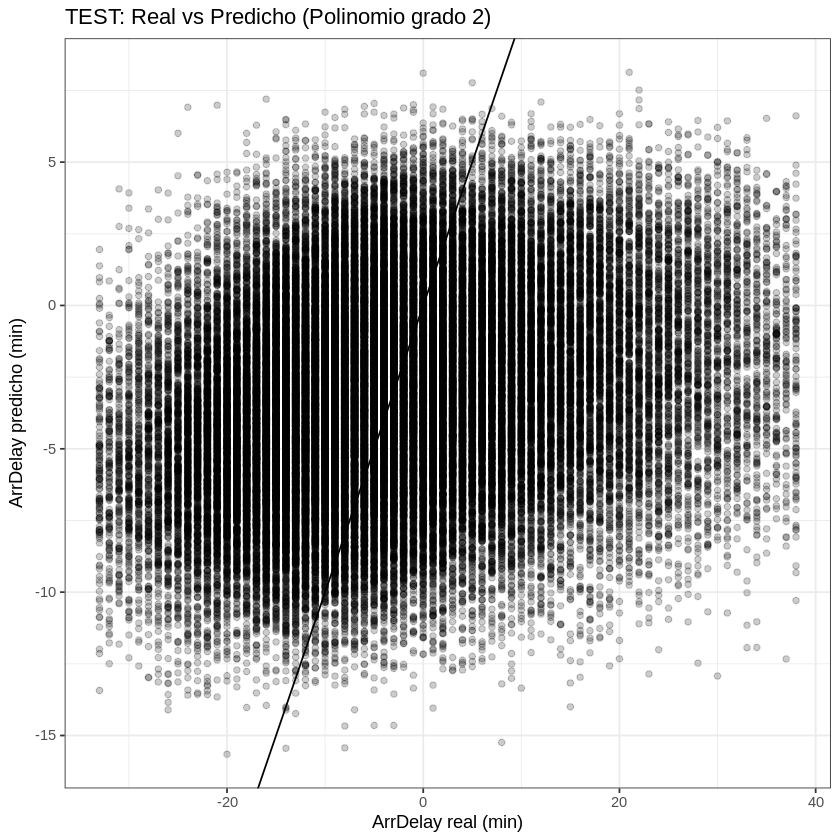

In [ ]:
# Gráfica de comparación real vs predicho (TEST) para Polinomio grado 2
# Creamos un data frame con los valores reales y predichos
df_pred_poly2 <- data.frame(actual = test$ArrDelay, pred = pred_test_poly2)

# Graficamos puntos y una línea de referencia 45°
ggplot(df_pred_poly2, aes(x = actual, y = pred)) +
  geom_point(alpha = 0.20) +
  geom_abline(slope = 1, intercept = 0) +
  labs(
    title = "TEST: Real vs Predicho (Polinomio grado 2)",
    x = "ArrDelay real (min)",
    y = "ArrDelay predicho (min)"
  ) +
  theme_bw()

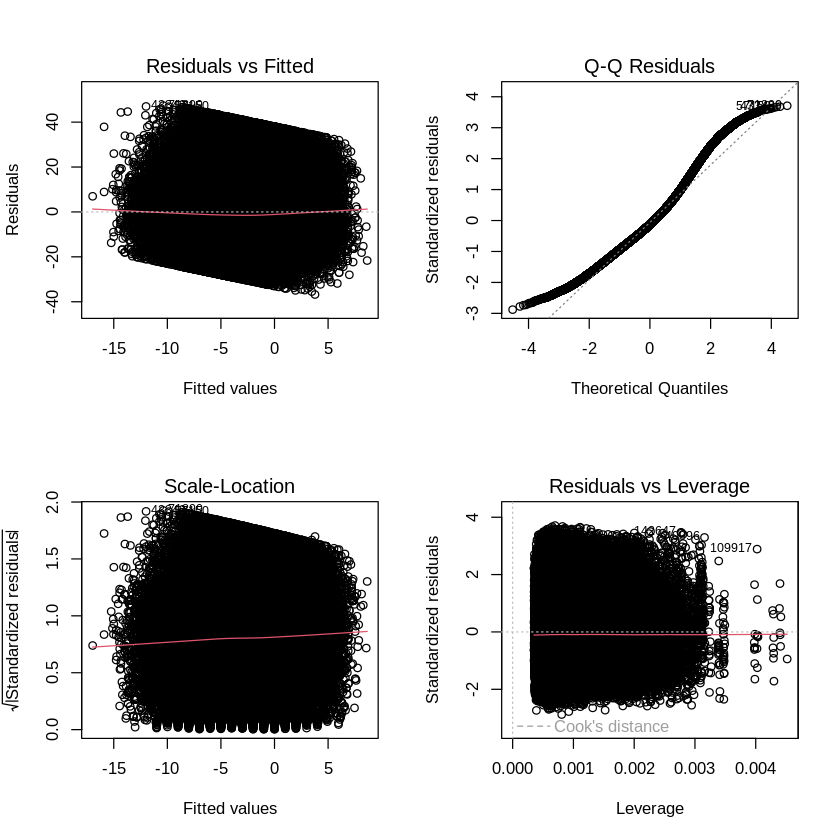

In [ ]:
par(mfrow = c(2, 2))
plot(fit_poly2)
par(mfrow = c(1, 1))

#### 4.15 **Regresión polinómica de grado 3**

Se ajusta un modelo con términos polinómicos de grado 3 para las variables de tiempo, de forma análoga al modelo de grado 2.

In [ ]:
# Modelo polinomial de grado 3
fit_poly3 <- lm(
  ArrDelay ~ Month + DayOfWeek + Carrier +
    poly(CRSDepMin, 3, raw = TRUE) +
    poly(CRSArrMin, 3, raw = TRUE) +
    OriginAirportID + DestAirportID,
  data = train
)

cat("
=== Resumen del modelo Polinomio grado 3 ===
")
print(summary(fit_poly3))

# Predicción en TEST
pred_test_poly3 <- predict(fit_poly3, newdata = test)

# Métricas en TEST
eval_tbl_poly3 <- tibble(
  truth = test$ArrDelay,
  estimate = pred_test_poly3
)

cat("
=== Métricas en TEST (Polinomio grado 3) ===
")
print(rmse(eval_tbl_poly3, truth = truth, estimate = estimate))
print(mae(eval_tbl_poly3,  truth = truth, estimate = estimate))
print(rsq(eval_tbl_poly3,  truth = truth, estimate = estimate))



=== Resumen del modelo Polinomio grado 3 ===

Call:
lm(formula = ArrDelay ~ Month + DayOfWeek + Carrier + poly(CRSDepMin, 
    3, raw = TRUE) + poly(CRSArrMin, 3, raw = TRUE) + OriginAirportID + 
    DestAirportID, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.816  -8.768  -1.659   7.219  47.242 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -9.892e+00  8.792e-01 -11.251  < 2e-16 ***
Month5                          -2.268e-01  1.184e-01  -1.916 0.055348 .  
Month6                           1.857e+00  1.203e-01  15.442  < 2e-16 ***
Month7                           1.506e+00  1.184e-01  12.715  < 2e-16 ***
Month8                           4.399e-01  1.178e-01   3.734 0.000189 ***
Month9                          -1.294e+00  1.200e-01 -10.781  < 2e-16 ***
Month10                         -6.877e-01  1.179e-01  -5.835 5.40e-09 ***
DayOfWeek2                      -8.316e-01  1.154e-01  -7.208

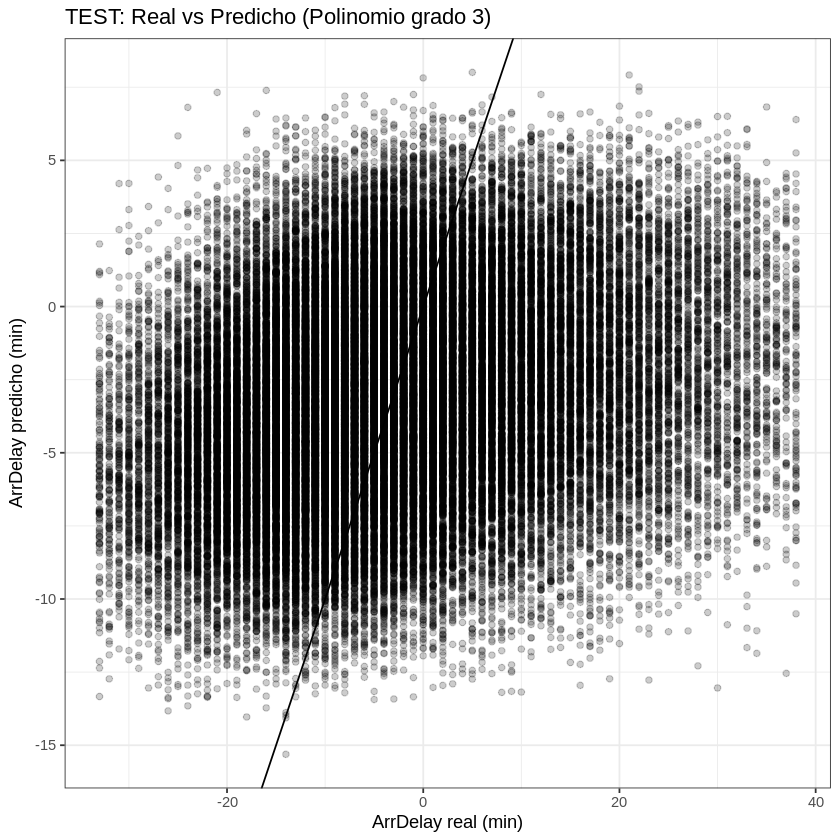

In [ ]:
# Gráfica de comparación real vs predicho (TEST) para Polinomio grado 3
# Creamos un data frame con los valores reales y predichos
df_pred_poly3 <- data.frame(actual = test$ArrDelay, pred = pred_test_poly3)

# Graficamos puntos y una línea de referencia 45°
ggplot(df_pred_poly3, aes(x = actual, y = pred)) +
  geom_point(alpha = 0.20) +
  geom_abline(slope = 1, intercept = 0) +
  labs(
    title = "TEST: Real vs Predicho (Polinomio grado 3)",
    x = "ArrDelay real (min)",
    y = "ArrDelay predicho (min)"
  ) +
  theme_bw()


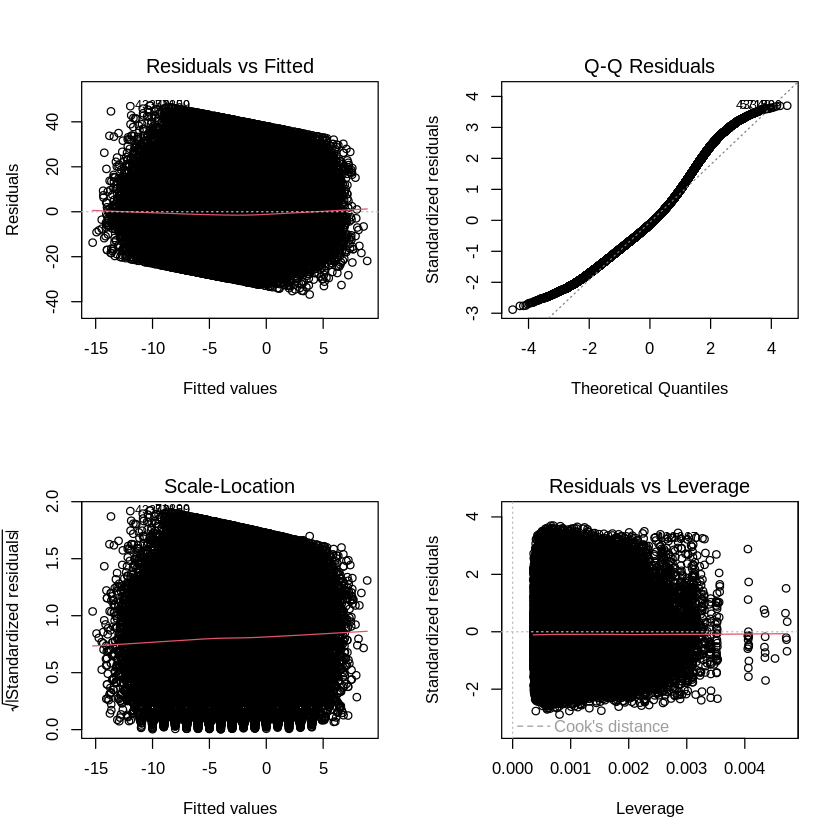

In [ ]:
par(mfrow = c(2, 2))
plot(fit_poly3)
par(mfrow = c(1, 1))

#### 4.16 **Clasificación**

In [ ]:
df_class <- df_model %>%
  mutate(
    ArrLate = factor(ArrDelay > 15, levels = c(FALSE, TRUE), labels = c("NoTarde", "Tarde"))
  )

# Dividir en conjunto de entrenamiento y prueba de forma estratificada por la clase
set.seed(123)
split_cls <- initial_split(df_class, prop = 0.7, strata = ArrLate)
train_cls <- training(split_cls)
test_cls  <- testing(split_cls)

#### 4.17 **Regresión logística**

In [ ]:
fit_logit <- glm(ArrLate ~ Month + DayOfWeek + Carrier + CRSDepMin + CRSArrMin + OriginAirportID + DestAirportID + DepDelay + DepDel15,
                 data = train_cls, family = binomial(link = "logit"))

# Resumen del modelo
summary(fit_logit)

# Predicciones de probabilidad en el conjunto de prueba
test_probs <- predict(fit_logit, newdata = test_cls, type = "response")
# Clasificación usando umbral 0.5
test_pred_class <- factor(ifelse(test_probs >= 0.5, "Tarde", "NoTarde"), levels = c("NoTarde", "Tarde"))

# Matriz de confusión y precisión (accuracy)
confusion_tab <- table(Predicho = test_pred_class, Real = test_cls$ArrLate)
accuracy <- sum(diag(confusion_tab)) / sum(confusion_tab)
confusion_tab
accuracy


Call:
glm(formula = ArrLate ~ Month + DayOfWeek + Carrier + CRSDepMin + 
    CRSArrMin + OriginAirportID + DestAirportID + DepDelay + 
    DepDel15, family = binomial(link = "logit"), data = train_cls)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -3.329e+00  1.948e-01 -17.087  < 2e-16 ***
Month5               -1.800e-01  3.822e-02  -4.711 2.47e-06 ***
Month6               -5.173e-02  3.719e-02  -1.391 0.164258    
Month7               -4.658e-02  3.680e-02  -1.266 0.205564    
Month8               -1.618e-01  3.743e-02  -4.323 1.54e-05 ***
Month9               -2.912e-01  4.021e-02  -7.241 4.44e-13 ***
Month10              -2.798e-01  3.874e-02  -7.221 5.14e-13 ***
DayOfWeek2           -1.637e-01  3.815e-02  -4.290 1.78e-05 ***
DayOfWeek3            6.754e-02  3.655e-02   1.848 0.064625 .  
DayOfWeek4            8.563e-02  3.594e-02   2.382 0.017196 *  
DayOfWeek5            1.829e-02  3.641e-02   0.502 0.615382    
DayOfWeek6    

         Real
Predicho  NoTarde Tarde
  NoTarde   62210  4101
  Tarde      1149  2815

[1] 0.9252935

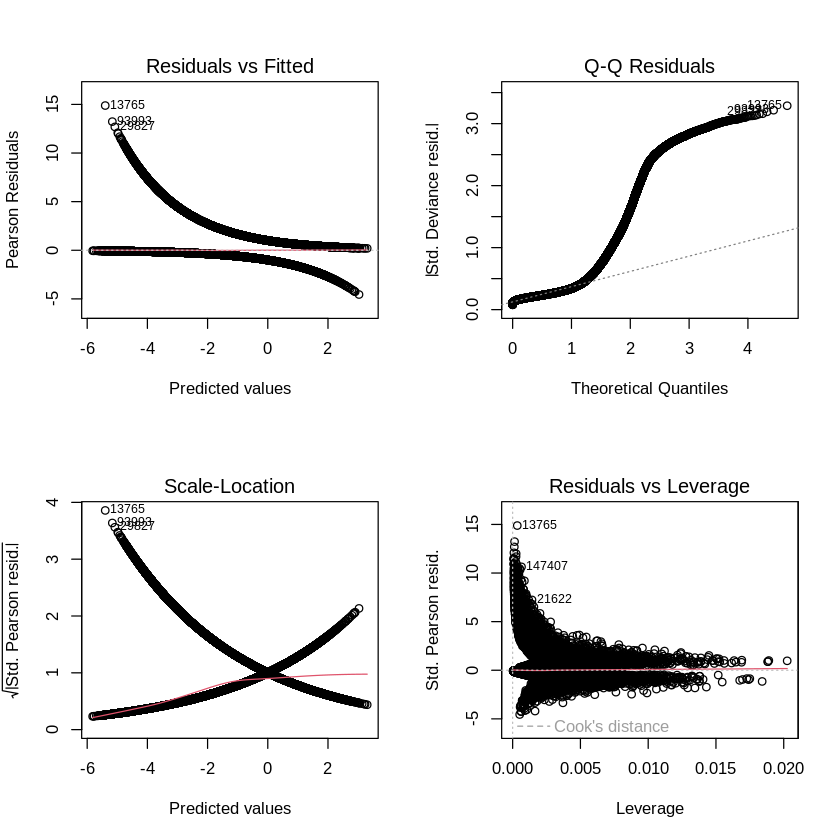

In [ ]:
par(mfrow = c(2, 2))
plot(fit_logit)
par(mfrow = c(1, 1))

In [ ]:

# Evaluación del modelo logístico con distintos umbrales
dumbrales <- seq(0.3, 0.5, by = 0.05)
metricas <- data.frame()
for (thr in dumbrales) {
  # Clasificación según el umbral 'thr'
  pred_class_thr <- factor(ifelse(test_probs >= thr, "Tarde", "NoTarde"), levels = c("NoTarde", "Tarde"))
  conf <- table(Predicho = pred_class_thr, Real = test_cls$ArrLate)
  # Sensibilidad (recall) para la clase 'Tarde'
  recall_Tarde <- ifelse(sum(conf[, "Tarde"]) > 0, conf["Tarde", "Tarde"] / sum(conf[, "Tarde"]), NA)
  # Especificidad para la clase 'NoTarde'
  espec_NoTarde <- ifelse(sum(conf[, "NoTarde"]) > 0, conf["NoTarde", "NoTarde"] / sum(conf[, "NoTarde"]), NA)
  accuracy_thr <- sum(diag(conf)) / sum(conf)
  metricas <- rbind(metricas, data.frame(umbral = thr,
                                         accuracy = accuracy_thr,
                                         recall_Tarde = recall_Tarde,
                                         especificidad_NoTarde = espec_NoTarde))
}

cat("
=== Métricas por umbral para el modelo logístico ===
")
print(metricas)

# Elegir un umbral alternativo (por ejemplo, 0.4) y evaluar
umbral_optimo <- 0.4
pred_class_opt <- factor(ifelse(test_probs >= umbral_optimo, "Tarde", "NoTarde"), levels = c("NoTarde", "Tarde"))
conf_opt <- table(Predicho = pred_class_opt, Real = test_cls$ArrLate)
cat("
Matriz de confusión con umbral =", umbral_optimo, "
")
print(conf_opt)

# Cálculo de sensibilidad y especificidad con umbral óptimo
recall_opt <- ifelse(sum(conf_opt[, "Tarde"]) > 0, conf_opt["Tarde", "Tarde"] / sum(conf_opt[, "Tarde"]), NA)
espec_opt <- ifelse(sum(conf_opt[, "NoTarde"]) > 0, conf_opt["NoTarde", "NoTarde"] / sum(conf_opt[, "NoTarde"]), NA)
cat("
Sensibilidad (Tarde) con umbral", umbral_optimo, ":", recall_opt, "
")
cat("Especificidad (NoTarde) con umbral", umbral_optimo, ":", espec_opt, "
")

# Determinar las variables con mayor peso en el modelo logístico
library(broom)
coef_df <- broom::tidy(fit_logit) %>%
  dplyr::filter(term != "(Intercept)") %>%
  dplyr::mutate(abs_est = abs(estimate)) %>%
  dplyr::arrange(dplyr::desc(abs_est))

cat("
=== Variables ordenadas por peso absoluto en el modelo logístico ===
")
print(head(coef_df, 15))


=== Métricas por umbral para el modelo logístico ===
  umbral  accuracy recall_Tarde especificidad_NoTarde
1   0.30 0.9153469    0.5513302             0.9550814
2   0.35 0.9201708    0.5180740             0.9640619
3   0.40 0.9235575    0.4836611             0.9715747
4   0.45 0.9251797    0.4478022             0.9772882
5   0.50 0.9252935    0.4070272             0.9818652

Matriz de confusión con umbral = 0.4 
         Real
Predicho  NoTarde Tarde
  NoTarde   61558  3571
  Tarde      1801  3345

Sensibilidad (Tarde) con umbral 0.4 : 0.4836611 
Especificidad (NoTarde) con umbral 0.4 : 0.9715747 

=== Variables ordenadas por peso absoluto en el modelo logístico ===
# A tibble: 15 × 6
   term                 estimate std.error statistic    p.value abs_est
   <chr>                   <dbl>     <dbl>     <dbl>      <dbl>   <dbl>
 1 DestAirportID12954     -0.642    0.285      -2.25 0.0242       0.642
 2 DestAirportID10299     -0.566    0.254      -2.23 0.0258       0.566
 3 OriginAirportID